# Extract data from output files

March 9, 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import subprocess as sp
import sys
import os
import glob

In [2]:
sys.path.append('/global/u1/v/vpa/project/jpt_notebooks/Cosmology/Cosmo_GAN/LBANN/lbann_cosmogan/3_analysis/')
from modules_image_analysis import *

[NbConvertApp] Converting notebook modules_image_analysis.ipynb to script
[NbConvertApp] Writing 8884 bytes to modules_image_analysis.py


## Extract image data 

In [11]:
main_dir='/global/cfs/cdirs/m3363/vayyar/cosmogan_data/results_data/'
fldr='20200331_131011_exagan/dump_outs/'
fldr='20200401_125919_exagan_0.1_1//dump_outs/'

# fldr='20200406_055957_exagan/dump_outs/model0-validation-epoch30-step836-gen_img_instance1_activation-output0.npy'

In [4]:
train_gen_img_lst=glob.glob(main_dir+fldr+'model0-training*-gen_img*-output0.npy')
train_inp_img_lst=glob.glob(main_dir+fldr+'model0-training*-inp_img*-output0.npy')

val_gen_img_lst=glob.glob(main_dir+fldr+'model0-validation*-gen_img*-output0.npy')
val_inp_img_lst=glob.glob(main_dir+fldr+'model0-validation*-inp_img*-output0.npy')


In [14]:
fname=val_gen_img_lst[0]
a1=np.load(fname)
img=a1[0,0,:,:]
print(a1.shape,img.shape)

(64, 1, 128, 128) (128, 128)


In [21]:
# fname=train_inp_img_lst[0]
# fname=main_dir+fldr
a1=np.load(fname)
samples=a1.reshape(a1.shape[0],128,128)
print(samples.shape)
img=samples[0,:]
print(samples.shape,img.shape)


(36, 128, 128)
(36, 128, 128) (128, 128)


In [17]:
# np.max(img)

### View single image

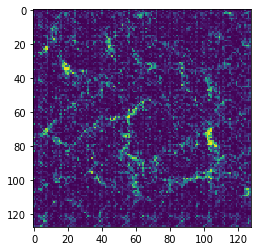

In [22]:
plt.figure()
plt.imshow(img)

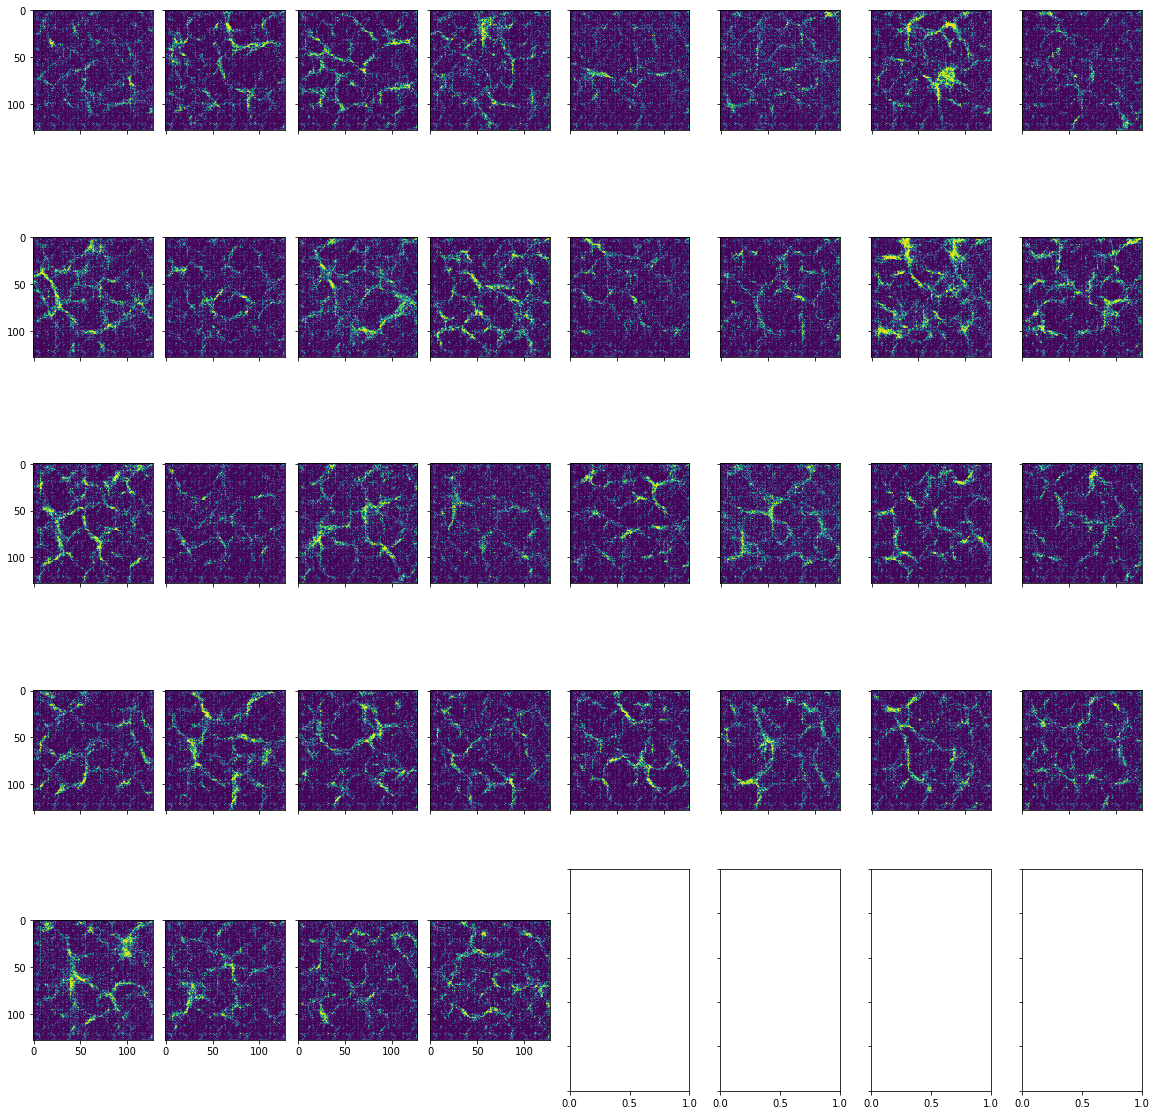

In [23]:
f_plot_grid(samples[:],8)